# Pandas desde cero

Aprenderemos la teoría básica de Pandas, cómo crear y manipular Series y DataFrames, funciones útiles y técnicas de indexación y filtrado.

---

## 1. Introducción y Configuración

### 1.1 ¿Qué es Pandas?

Pandas es la librería de Python para el análisis y manipulación de datos.  
Ofrece estructuras de datos de alto rendimiento como **Series** (1D) y **DataFrame** (2D) con etiquetas en filas y columnas.

### 1.2 Instalación e Importación

```bash
pip install pandas


# 🧮 Diferencias entre NumPy y pandas

En el ecosistema de Python para ciencia de datos, **NumPy** y **pandas** son dos bibliotecas fundamentales. Aunque se complementan, tienen enfoques distintos:

---

## 🔢 NumPy: Computación Numérica

- **Estructura principal:** `ndarray` (matriz multidimensional).
- **Datos homogéneos:** Todos los elementos deben ser del mismo tipo (por ejemplo, todos `float64`).
- **Ideal para:** Álgebra lineal, estadísticas, simulaciones, procesamiento de imágenes y señales.
- **Ventaja clave:** Muy rápido y eficiente en memoria para cálculos numéricos masivos.

```python
import numpy as np

a = np.array([1, 2, 3, 4])
print(a.mean())  # Media de los elementos

# 📊 Introducción a pandas

**pandas** es una biblioteca de Python diseñada para facilitar el análisis y manipulación de datos estructurados. Es especialmente útil cuando trabajamos con datos tabulares, como hojas de cálculo, archivos CSV o bases de datos.

---

## 🧱 Estructuras principales

- **Series:** Una columna con etiquetas. Similar a un array de NumPy, pero con índice.
- **DataFrame:** Una tabla bidimensional con filas y columnas etiquetadas. Es la estructura más usada.

```python
import pandas as pd

# Crear una Series
s = pd.Series([10, 20, 30], index=['a', 'b', 'c'])

# Crear un DataFrame
df = pd.DataFrame({
    'Nombre': ['Ana', 'Luis', 'Carlos'],
    'Edad': [23, 34, 45]
})


In [ ]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd


## 2. Teoría Básica de Series y DataFrames

### 2.1 Estructuras Principales

- **Series**: arreglo unidimensional con etiquetas (índice).  
- **DataFrame**: tabla bidimensional con filas y columnas etiquetadas.

### 2.2 Creación de Series y DataFrames


In [8]:
# Series a partir de lista y diccionario
s = pd.Series([10, 20, 30], index=['a', 'b', 'c'])
s2 = pd.Series({'x': 1, 'y': 2, 'z': 3})

# DataFrame a partir de diccionario de listas
df = pd.DataFrame({
    'Nombre': ['Ana', 'Luis', 'Eva'],
    'Edad': [23, 19, 31],
    'Puntaje': [88.5, 92.3, 79.4]
})

# DataFrame a partir de lista de diccionarios
data = [
    {'A': 1, 'B': 2},
    {'A': 3, 'B': 4, 'C': 5}
]
df2 = pd.DataFrame(data)

## 3. Atributos Clave de un DataFrame

| Atributo     | Descripción                                 |
|--------------|---------------------------------------------|
| `df.shape`   | Tupla (filas, columnas)                     |
| `df.size`    | Número total de elementos                   |
| `df.ndim`    | Número de dimensiones (siempre 2 para DF)   |
| `df.columns` | Etiquetas de columnas                       |
| `df.index`   | Etiquetas de filas                          |
| `df.dtypes`  | Tipo de dato de cada columna                |

```python

In [ ]:
print(df.shape)
print(df.columns)
print(df.dtypes)


(3, 3)
Index(['Nombre', 'Edad', 'Puntaje'], dtype='object')
Nombre      object
Edad         int64
Puntaje    float64
dtype: object


## 4. Operaciones Básicas

- `df.head(n)`         : primeras *n* filas  
- `df.tail(n)`         : últimas *n* filas  
- `df.info()`          : resumen de índice, columnas y tipos  
- `df.describe()`      : estadísticas descriptivas de columnas numéricas  
- `df['col']` o `df.col`: acceso a columna  
- `df[['col1','col2']]`: acceso a múltiples columnas  
- `df['col'] = ...`    : crear o modificar columna  


In [ ]:
# Mostrar las primeras 3 filas
print(df.head(3))

# Crear y acceder a una columna
print(df['Edad'])
df['Mayor'] = df['Edad'] >= 18
print(df.head(3))

  Nombre  Edad  Puntaje
0    Ana    23     88.5
1   Luis    19     92.3
2    Eva    31     79.4
0    23
1    19
2    31
Name: Edad, dtype: int64
  Nombre  Edad  Puntaje  Mayor
0    Ana    23     88.5   True
1   Luis    19     92.3   True
2    Eva    31     79.4   True


## 5. Funciones Útiles

| Función                      | Descripción                                         |
|------------------------------|-----------------------------------------------------|
| `df.dropna()`                | Elimina filas con valores NA                        |
| `df.fillna(valor)`           | Rellena NA con un valor                             |
| `df.sort_values(by)`         | Ordena por una o más columnas                       |
| `df.groupby(col)`            | Agrupa por columna y permite agregaciones           |
| `df.merge(otro, on)`         | Combina dos DataFrames por columna clave            |
| `df.apply(func, axis)`       | Aplica función a filas (`axis=1`) o columnas (`axis=0`) |
| `pd.concat([df1, df2])`      | Concatena DataFrames                                |


In [ ]:
# Ejemplo de groupby y agregación
df_group = df.groupby('Mayor')['Puntaje'].mean()
print(df_group)

# Merge de df y df2 por índice
df_merged = df.merge(df2, left_index=True, right_index=True, how='left')
print(df_merged)


Mayor
True    86.733333
Name: Puntaje, dtype: float64
  Nombre  Edad  Puntaje  Mayor    A    B    C
0    Ana    23     88.5   True  1.0  2.0  NaN
1   Luis    19     92.3   True  3.0  4.0  5.0
2    Eva    31     79.4   True  NaN  NaN  NaN


## 6. Indexación y Filtrado

### 6.1 `.loc` por etiqueta
- Selección basada en etiquetas de filas y columnas.

In [ ]:
# Asignamos un índice a df2 para el ejemplo
df2.index = ['a', 'b']
# Filas 'a' y 'c', columnas 'A' y 'B'
print(df2.loc[['a','b'], ['A','C']])


   A    C
a  1  NaN
b  3  5.0


### 6.2 `.iloc` por posición
- Selección basada en posiciones numéricas.

In [ ]:
# Filas 0-1, columnas 0-1
print(df.iloc[0:2, 0:2])


### 6.3 Filtrado booleano
- Usar condiciones para filtrar filas.

In [ ]:
# Filtrar mayores de 25 años
print(df[df['Edad'] > 25])

# Varias condiciones combinadas
print(df[(df['Edad'] > 20) & (df['Puntaje'] > 80)])


## Ejercicios

In [ ]:
import pandas as pd

data = {
    'Nombre': ['Ana', 'Luis', 'Carlos', 'María'],
    'Edad': [23, 34, 45, 29],
    'Ciudad': ['Madrid', 'Barcelona', 'Sevilla', 'Bilbao']
}

df = pd.DataFrame(data)

- Selecciona solo las filas donde la edad sea mayor de 30.

- Extrae la segunda fila usando .iloc.

- Muestra solo las columnas "Nombre" y "Edad".

In [ ]:
# Filas con edad mayor a 30
mayores_30 = df[df['Edad'] > 30]

# Segunda fila con iloc
segunda_fila = df.iloc[1]

# Columnas "Nombre" y "Edad"
nombre_edad = df[['Nombre', 'Edad']]

print("Mayores de 30:\n", mayores_30)
print("\nSegunda fila:\n", segunda_fila)
print("\nNombre y Edad:\n", nombre_edad)

- Calcula la edad media.

- Muestra un resumen estadístico del DataFrame.

- Cuenta cuántas personas hay por ciudad.

In [ ]:
# Edad media
edad_media = df['Edad'].mean()

# Resumen estadístico
resumen = df.describe()

# Conteo por localidad
conteo_ciudad = df['Localidad'].value_counts()

print("Edad media:", edad_media)
print("\nResumen estadístico:\n", resumen)
print("\nConteo por ciudad:\n", conteo_ciudad)

Usaremos el dataset de iris desde la biblioteca seaborn, que lo carga como DataFrame

- Muestra cuántas especies distintas hay.

- Calcula la media del largo del pétalo por especie.

- Guarda el DataFrame en un CSV con iris.to_csv('iris.csv', index=False)

In [10]:
import seaborn as sns

iris = sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [11]:
# Especies distintas
especies = iris['species'].unique()

# Media del largo del pétalo por especie
media_petal_length = iris.groupby('species')['petal_length'].mean()

# Guardar como CSV
iris.to_csv('iris.csv', index=False)

print("Especies:", especies)
print("\nMedia del largo del pétalo por especie:\n", media_petal_length)

Especies: ['setosa' 'versicolor' 'virginica']

Media del largo del pétalo por especie:
 species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64


- Crea un DataFrame con algunos valores None.

- Usa .dropna() y .fillna() para limpiar.

- Cambia el tipo de una columna con .astype()

In [ ]:
datos = {
    'Nombre': ['Ana', 'Luis', None, 'María'],
    'Edad': [23, None, 45, 29],
    'Ciudad': ['Madrid', 'Barcelona', 'Sevilla', None]
}

df2 = pd.DataFrame(datos)

# Eliminar filas con valores nulos
sin_nulos = df2.dropna()

# Rellenar nulos con valores por defecto
rellenado = df2.fillna({'Nombre': 'Desconocido', 'Edad': df2['Edad'].mean(), 'Ciudad': 'Sin ciudad'})

# Cambiar tipo de Edad a entero (después de rellenar)
rellenado['Edad'] = rellenado['Edad'].astype(int)

print("Sin nulos:\n", sin_nulos)
print("\nRellenado:\n", rellenado)


## Práctica

1. Crea un DataFrame con las ventas diarias (columna `Ventas`) de 7 días y calcula la suma, media, mínima y máxima.  
2. Añade una columna `Descuento` con valor 5% y calcula `Venta_Neta`.  
3. Carga un CSV de ejemplo con `pd.read_csv()`, muestra sus 5 primeros registros y tipos de datos.  
4. Agrupa un DataFrame de transacciones por `Cliente` y calcula el total de compra por cliente.


In [ ]:
import pandas as pd

# DataFrame con ventas diarias
ventas = pd.DataFrame({
    'Ventas': [150, 200, 175, 300, 250, 400, 100]
}, index=pd.date_range(start='2025-09-01', periods=7, freq='D'))

print("Ventas diarias:")
print(ventas)

# Cálculos básicos
print("\nSuma total:", ventas['Ventas'].sum())
print("Media:", ventas['Ventas'].mean())
print("Mínimo:", ventas['Ventas'].min())
print("Máximo:", ventas['Ventas'].max())

# Añadir columna Descuento (5%) y calcular Venta_Neta
ventas['Descuento'] = 0.05
ventas['Venta_Neta'] = ventas['Ventas'] * (1 - ventas['Descuento'])

print("\nVentas con descuento:")
print(ventas)

# Cargar CSV de ejemplo
# Usamos un CSV de ejemplo de pandas
url = "https://people.sc.fsu.edu/~jburkardt/data/csv/hw_200.csv"
df_csv = pd.read_csv(url)

print("\nPrimeros 5 registros del CSV:")
print(df_csv.head())

print("\nTipos de datos:")
print(df_csv.dtypes)

# Agrupar transacciones por Cliente
transacciones = pd.DataFrame({
    'Cliente': ['Ana', 'Luis', 'Ana', 'Pedro', 'Luis', 'Ana'],
    'Compra': [100, 200, 50, 300, 150, 75]
})

total_por_cliente = transacciones.groupby('Cliente')['Compra'].sum()

print("\nTotal de compra por cliente:")
print(total_por_cliente)


# Ejemplo aplicación de pandas dentro del aprendizajo automático

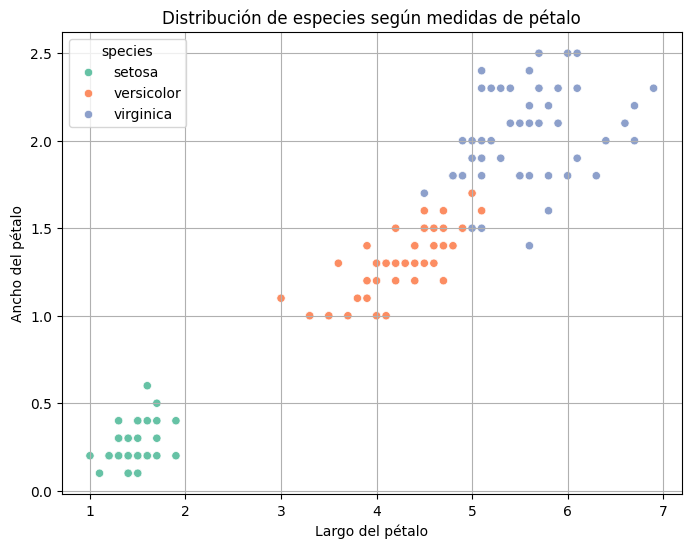

Precisión: 1.0

Reporte de clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Cargar el dataset iris
iris = sns.load_dataset('iris')

# 2. Visualización: dispersión de largo vs ancho del pétalo
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', palette='Set2')
plt.title('Distribución de especies según medidas de pétalo')
plt.xlabel('Largo del pétalo')
plt.ylabel('Ancho del pétalo')
plt.grid(True)
plt.show()

# 3. Preparar datos para el modelo
X = iris.drop('species', axis=1)
y = iris['species']

# 4. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Entrenar modelo Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 6. Predicciones
y_pred = clf.predict(X_test)

# 7. Evaluación
print("Precisión:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
